# GRAVITY data reduction process: Tables


**Pablo Marcos-Arenal**

Centro de Astrobiología (INTA-CSIC)


This file intends to cover the tables of the paper related to the near-infrared K- band observations with the GRAVITY interferometer at Very Large Telescope Interferometer (VLTI) at the Paranal Observatory. The star parameters and model results files in CSV format are taken as input.

Those observations of Herbig Ae/Be stars provide with spatially and spectrally resolved data of their inner disks.



In [39]:
# This line configures matplotlib to show figures embedded in the notebook, 
# instead of opening a new window for each figure. More about that later. 
# If you are using an old version of IPython, try using '%pylab inline' instead.

%matplotlib inline

#%matplotlib qt

#Import modules
import numpy as np
import pandas as pd
import seaborn as sns

from gravi_plot_functions import *


## Table 1: Stellar parameters
This table (size_luminosity_table) covers the stellar parameters of our sources and the extended related data sources with their references.
A subsample with the sources in our sample is set in the *sample_stellar_params* dataframe.


In [40]:
size_luminosity_table = pd.read_csv("./tables/size_luminosity_table_ln.csv", sep=';', header=[0] ,encoding='latin-1')

size_luminosity_table = size_luminosity_table.rename(columns={"ï»¿Star": "Star"})

sample_stellar_params = size_luminosity_table.iloc[[0,1,2,3,4], :] 

table_stellar_parameters=sample_stellar_params[['Star','D Gaia (pc)','error D Gaia (pc)','T*(K)','err T*',
                              'log L* (Lsun)','err logL*(Lsun)','DeltaDb (mag)','errDeltaDb (mag)']]
table_stellar_parameters.head()

#print(table_stellar_parameters.to_latex(index=False))

,Star,D Gaia (pc),error D Gaia (pc),T*(K),err T*,log L* (Lsun),err logL*(Lsun),DeltaDb (mag),errDeltaDb (mag)
0,V590 Mon,1722.0,166.0,12500,1000,2.06,0.37,0.00,0.05
1,PDS 281,932.0,44.0,16000,1500,3.78,0.24,0.00,0.05
2,HD 94509,1830.0,180.0,11500,1000,3.13,0.24,0.00,0.05
3,DG Cir,833.0,48.0,11000,3000,1.67,0.72,0.79,0.05
4,HD 141926,1340.0,130.0,28000,1500,4.87,0.26,0.20,0.05


This table doesn't include V magnitudes, Masses and ages, but those were already set in the Marcos-Arenal+2020 latex file so it's useless to redo that again.


## Table 2: Model results
The results obtained with LITpro are collected in the */LITpro_output/LITpro_models_results_ln.csv* file.
The *LITpro_model_results_safe* dataframe stores the values of the ring holes limits as <0.8, instead of the values estimated from models and required to perform the following calculations.

Table 2 includes LITpro models results on the continuum. Its columns are: Star names, ${\chi}^2$ of the model, flux weight of the star, flux weight of the disk, flux weight of the background (if any) and Disk radius in [mas] and [au].

This table only shows results measured in the continuum. All sources are using elungated ring models plus a punctual source (eRing) except for V590Mon that is using an elongated Gaussian plus punstual source model (eGauss).

### Disk Sizes
Using LITpro results on disk angular sizes (${\delta}[mas]$),  we calculate its disk radius ($d[au]$) from its distance ($D$) through the *disk_size_calculator(distance, angular_size)* function in *gravi_plot_functions* module.
The disk angular sizes (${\delta}[mas]$) provided by LITpro are given as FWHM of the minor axis of the elongated Gaussian. 
It is convention to use this FWHM as the diameter of the disk. 
The ring angular sizes (𝛿[𝑚𝑎𝑠]) provided by LITpro are given for the minor axis of the elongated ring. 

In [80]:
#Read file
LITpro_model_results = pd.read_csv("./LITpro_output/LITpro_models_results_ln.csv", sep=';', header=[0] ,encoding='latin-1')

#Only takes continuum measurements
LITpro_model_results_cont = LITpro_model_results[LITpro_model_results["Cont_or_Brg"] == "Cont"]

#remove non-selected models
#LITpro_model_results_cont = LITpro_model_results_cont.drop([0,8,10])

#Calculate disk radius in au units
disk_radius=[]
disk_radius_error=[]


#Apply  gravi_plot_functions.disk_size_error_calculator
disk_radius, disk_radius_error = disk_size_error_calculator(sample_stellar_params['D Gaia (pc)'].to_numpy(),
                                                                       sample_stellar_params['error D Gaia (pc)'].to_numpy(),
                                                                       LITpro_model_results_cont['r_hole (mas)'].to_numpy(),
                                                                       LITpro_model_results_cont['error r_hole (mas)'].to_numpy())

table2_model_results = LITpro_model_results_cont[['Object', 'Chi2', 'sigma_Chi2','flux_ering', 'err_flux_ring', 'flux_punct', 'err_flux_punct',
                                    'flux_bckg', 'err_flux_bckg', 'major_axis_pos_angle1', 'err_pos_angle','r_hole (mas)','error r_hole (mas)']].copy()

#Rename table2_model_results column to avoid character error from CSV reading
table2_model_results = table2_model_results.rename(columns={"ï»¿Object": "Object"})

#Reset index. Tables 1 and 2 have not the same indexes for same star
table2_model_results = table2_model_results.reset_index(drop=True)
table2_model_results['disk_radius (au)']=pd.DataFrame(disk_radius)
table2_model_results['disk_radius_error (au)']=pd.DataFrame(disk_radius_error)


### Disk inclination calculation

Use the disk_inclination_calculator() function to calculate disk inclinations and their errors.

> ⚠️ Warning: LITpro models provides with null values for the minor axis internal diameter and elongation close to unit, meaning that they 
                have face on disks. Their inclination values must be null.



In [81]:
#Calculate disk inclination in [deg]
inclination=[]
inclination_error=[]

inclination, inclination_error = disk_inclination_calculator(LITpro_model_results_cont['elong_ratio'].to_numpy(),
                                                             LITpro_model_results_cont['err_elong_ratio'].to_numpy())

#Set results in table 2
table2_model_results['inclination']=pd.DataFrame(inclination)
table2_model_results['inclination_error']=pd.DataFrame(inclination_error)
table2_model_results.head()

# Print to latex format:
#print(table2_model_results.to_latex(index=False))
#print(LITpro_model_results_cont[['Object','Chi2','sigma_Chi2','flux_ering','err_flux_ring','flux_ering','err_flux_ring',
#                                    'flux_bckg','err_flux_bckg','r_hole (mas)','error r_hole (mas)']].to_latex(index=False))

# Write table to CSV file
table2_model_results.to_csv('./tables/table2_model_results.csv')


/pcdisk/stark/pmarcos/CAB/Development/python_tools/gravi_plot/gravi_plot_functions.py:368: RuntimeWarning: divide by zero encountered in true_divide
  inclination_error = (180/ np.pi) * (np.divide(1,(np.power(elongation,4) - np.power(elongation,2)))) * elongation_error


### Data from Perraut+2019
The following data are retrieved from [Perraut et al. 2019](https://arxiv.org/abs/1911.00611). 
From all the sources in [Perraut et al. 2019](https://arxiv.org/abs/1911.00611), we took those included
in [Fairlamb et al. 2015](http://arxiv.org/abs/1507.05967) or [Mendigutía et al. 2011](http://arxiv.org/abs/1109.3288).
The later publications indicates whose sources have been magnetospherically modelled (in green color in the following figure) 
and whose haven't (only one, in yellow color).

| Object   | Simbad_Name   |   FWHM(mas) |   FWHM_error |   log_L |   log_L+error |   log_L-error | magnetospheric     |   distance_pc |
|:---------|:--------------|------------:|-------------:|--------:|--------------:|--------------:|:-------------------|--------------:|
| HD158643 | * c Oph       |        6.18 |         0.14 |    2.22 |          0.26 |          0.07 | magnetospheric     |           123 |
| HD100546 | HD 100546     |        5.02 |         0.12 |    1.37 |          0.07 |          0.05 | magnetospheric     |           110 |
| HD114981 | HD 114981     |       12.1  |         0.5  |    3.24 |          0.12 |          0.09 | magnetospheric     |           705 |
| HD139614 | HD 139614     |        9.57 |         0.43 |    0.77 |          0.03 |          0.01 | magnetospheric     |           135 |
| HD142527 | HD 142527     |        2.52 |         0.06 |    0.96 |          0.03 |          0.01 | magnetospheric     |           157 |
| HD142666 | HD 142666     |        1.45 |         0.26 |    0.94 |          0.04 |          0.05 | magnetospheric     |           148 |
| HD144432 | HD 144432     |        2.76 |         0.07 |    0.97 |          0.04 |          0.01 | magnetospheric     |           155 |
| HD145718 | HD 145718     |        9.14 |         0.66 |    0.9  |          0.05 |          0.04 | magnetospheric     |           153 |
| HD150193 | HD 150193     |        5.26 |         0.12 |    1.37 |          0.04 |          0.04 | magnetospheric     |           151 |
| HD163296 | HD 163296     |        5.9  |         0.14 |    1.2  |          0.06 |          0.03 | magnetospheric     |           102 |
| HD179218 | HD 179218     |       17    |         2.1  |    2.05 |          0.09 |          0.14 | magnetospheric     |           266 |
| HD190073 | HD 190073     |        4.08 |         0.1  |    2.9  |          0.16 |          0.2  | magnetospheric     |           871 |
| HD58647  | HD 58647      |        3.99 |         0.09 |    2.44 |          0.11 |          0.09 | magnetospheric     |           319 |
| HD85567  | HD 85567      |        1.17 |         0.02 |    3.19 |          0.1  |          0.08 | non-magnetospheric |          1023 |
| HD95881  | HD 95881      |        2.89 |         0.2  |    2.85 |          0.1  |          0.07 | magnetospheric     |          1168 |
| HD97048  | HD 97048      |        4.38 |         0.1  |    1.54 |          0.07 |          0.6  | magnetospheric     |           185 |
| HD98922  | HD 98922      |        4.69 |         0.11 |    3.03 |          0.06 |          0.05 | magnetospheric     |           689 |
| PDS27    | SS 103        |        1.66 |         0.07 |    4.15 |          0.37 |          0.39 | magnetospheric     |          2550 |
| V1818Ori | V* V1818 Ori  |        2.7  |         0.7  |    2.96 |          0.24 |          0.29 | magnetospheric     |           695 |
| HD144668 | V* V856 Sco   |        4.08 |         0.1  |    1.72 |          0.05 |          0.04 | magnetospheric     |           161 |



In [58]:
table3_perraut_2019 = pd.read_csv("./tables/table3_perraut_2019.csv", sep=';', header=0)


### Data from Millan-Gabet et al. 2006
The following data are retrieved from a selection of publications, all of them used in figure 2 of [Millan-Gabet et al. 2006](http://arxiv.org/abs/astro-ph/0603554). The original sources are [Millan-Gabet et al. 2001](http://arxiv.org/abs/astro-ph/0008072), 
[Danchi et al. 2001](https://iopscience.iop.org/article/10.1086/323530), [Tuthill et al. 2001](astro-ph/0102240), [Eisner et al. 2004](https://iopscience.iop.org/article/10.1086/423314) and [Monnier et al. 2005](https://iopscience.iop.org/article/10.1086/496877).

| Object      |    D(pc) |    (+)dD |    (-)dD | Rd(mas)   |   (+)dRd |   (-)dRd |   logL(Lsun) |   (+)dlogL |   (-)dlogL |   ADb |   Adb_error(+) |   Adb_error(-) | logLacc[Lsun]   |   (+)dlogLacc |   (-)dlogLacc | logMdot[Msun yr-1]   |   (+)dlogMdot |   (-)dlogMdot |
|:------------|---------:|---------:|---------:|:----------|---------:|---------:|-------------:|-----------:|-----------:|------:|---------------:|---------------:|:----------------|--------------:|--------------:|:---------------------|--------------:|--------------:|
| BD-06 1253  |  489.956 |  38.4811 |  38.4811 | 2.5       |     0.1  |     0.1  |         2.06 |       0.09 |       0.12 |  0.87 |           0.05 |           0.05 | <0.79           |        nan    |        nan    | <-6.54               |        nan    |        nan    |
| EM* AS 442  |  863.483 |  22.1444 |  22.1444 | 1.13      |     0.15 |     0.08 |         2.42 |       0.05 |       0.05 |  0.48 |           0.07 |           0.07 | 1.91            |          0.12 |          0.12 | -5.49                |          0.15 |          0.15 |
| EM* MWC 297 |  375     |  22      |  18      | 21.9      |     1.2  |   nan    |         4.41 |       0.39 |       0.5  |  0.11 |           0.08 |           0.08 | 4.08            |          0.21 |          0.2  | -3.61                |          0.19 |          0.2  |
| HD 31648    |  161.773 |   1.9916 |   1.9916 | 3.05      |     0.03 |     0.03 |         1.38 |       0.04 |       0.04 |  0.05 |           0.07 |           0.07 | 0.85            |          0.15 |          0.15 | -6.57                |          0.21 |          0.17 |
| HD 58647    |  318.522 |   4.322  |   4.322  | 0.82      |     0.13 |     0.13 |         2.58 |       0.04 |       0.04 |  0.18 |           0.07 |           0.07 | -4.84           |          0.22 |          0.22 | 2.47                 |          0.23 |          0.23 |
| HD 141569   |  110.63  |   0.91   |   0.88   | <2        |   nan    |   nan    |         1.34 |       0.06 |       0.07 |  0.05 |           0.05 |           0.05 | 0.22            |          0.17 |          0.18 | -7.35                |          0.18 |          0.15 |
| HD 142666   |  148.3   |   2      |   1.9    | 0.29      |     0.05 |     0.04 |         1.08 |       0.1  |       0.11 |  0.18 |           0.07 |           0.07 | 0.12            |          0.18 |          0.18 | -7.24                |          0.17 |          0.17 |
| HD 144432   |  155.4   |   2.4    |   2.2    | 0.49      |     0.05 |     0.03 |         1.18 |       0.09 |       0.09 |  0.07 |           0.05 |           0.05 | 0.38            |          0.2  |          0.21 | -6.99                |          0.18 |          0.2  |
| HD 150193   |  150.8   |   2.7    |   2.5    | 0.58      |     0.15 |     0.09 |         1.56 |       0.14 |       0.15 |  0.07 |           0.05 |           0.05 | 0.71            |          0.15 |          0.15 | -6.75                |          0.15 |          0.18 |
| HD 163296   |  101.496 |   1.1785 |   1.1785 | 0.45      |     0.02 |     0.03 |         1.34 |       0.04 |       0.04 |  0.06 |           0.05 |           0.05 | -7.49           |          0.14 |          0.3  | 0.08                 |          0.14 |          0.3  |
| HD 179218   |  266     |   5.6    |   5.2    | 6.7       |     1.5  |     1.5  |         1.98 |       0.07 |       0.07 |  0.05 |           0.05 |           0.05 | 1.08            |          0.13 |          0.13 | -6.31                |          0.12 |          0.12 |
| HD 190073   |  870     | 100      |  70      | 3.76      |     0.23 |     0.42 |         2.84 |       0.16 |       0.14 |  0.22 |           0.07 |           0.07 | 2.31            |          0.18 |          0.15 | -4.97                |          0.18 |          0.14 |
| V* CQ Tau   |  163.119 |   2.1845 |   2.1845 | 2.75      |     0.1  |     0.11 |         0.89 |       0.02 |       0.02 |  0.02 |           0.07 |           0.07 | -0.84           |        nan    |        nan    | -8.30                |        nan    |        nan    |
| V* T Ori    |  408     |  13      |  11      | <1.4      |   nan    |   nan    |         1.7  |       0.18 |       0.18 |  0.09 |           0.07 |           0.07 | 0.92            |          0.18 |          0.18 | -6.48                |          0.15 |          0.17 |
| V* UX Ori   |  324.971 |   5.3753 |   5.3753 | 2.36      |     0.43 |     0.2  |         1.18 |       0.11 |       0.15 |  0.87 |           0.05 |           0.05 | <0.13           |        nan    |        nan    | <-7.26               |        nan    |        nan    |
| V* WW Vul   |  504.032 |   9.349  |   9.349  | 0.99      |     0.13 |     0.08 |         1.54 |       0.06 |       0.06 |  0.08 |           0.07 |           0.07 | 0.95            |          0.15 |          0.15 | -6.51                |          0.21 |          0.19 |
| V* Z CMa    | 1050     | nan      | nan      | 4.15      |     0.25 |     0.25 |         2.38 |       0.27 |       0.89 |  1.08 |           0.05 |           0.05 | -3.01           |          0.2  |          0.19 | 4.05                 |          0.22 |          0.22 |

In [59]:
table4_millan_gabet_2006 = pd.read_csv("./tables/table4_millan_2006.csv", sep=';', header=0)
#print(table4_millan_gabet_2006.to_markdown(showindex=False))

### Figure Disks radius as a function of luminosity

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


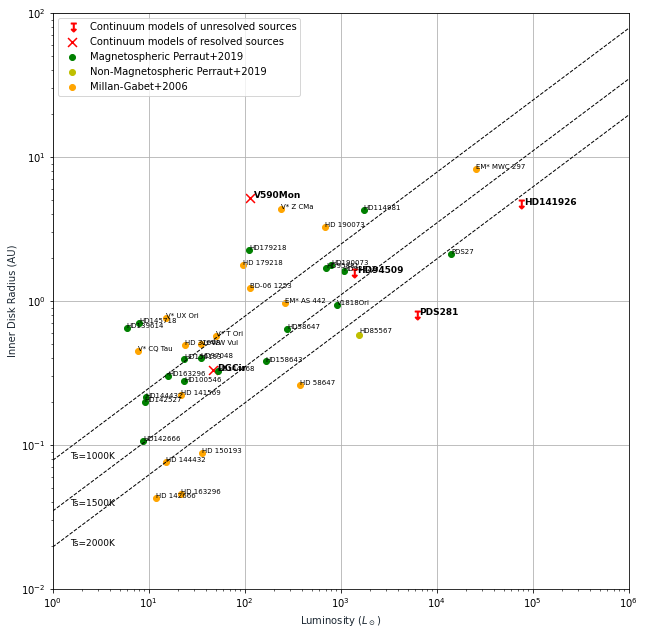

In [60]:

#From our sample
log_luminosity_sample = sample_stellar_params[['log L* (Lsun)','err logL*(Lsun)']]
log_luminosity_sample = log_luminosity_sample.reset_index(drop=True)

luminosity_sample=np.power(10,log_luminosity_sample)
      
luminosity_sample['Object'] = pd.Series(table2_model_results['Object'])

#V590Mon and DGCir models provide exact values for disk sizes
resolved_sources_luminosity_sample = luminosity_sample[(luminosity_sample['Object'] == 'V590Mon')|
                                     (luminosity_sample['Object'] == 'DGCir')]

resolved_sources_table2 = table2_model_results[(table2_model_results['Object'] == 'V590Mon')|(table2_model_results['Object'] == 'DGCir')]
resolved_sources = resolved_sources_luminosity_sample.merge(resolved_sources_table2)

#PDS281, HD94509 and HD141926 can only give minimum disk size
unresolved_sources_luminosity_sample = luminosity_sample[(luminosity_sample['Object'] == 'PDS281')|(luminosity_sample['Object'] == 'HD94509')|
                                       (luminosity_sample['Object'] == 'HD141926')]

unresolved_sources_table2 = table2_model_results[(table2_model_results['Object'] == 'PDS281')|(table2_model_results['Object'] == 'HD94509')|(table2_model_results['Object'] == 'HD141926')]
unresolved_sources = unresolved_sources_luminosity_sample.merge(unresolved_sources_table2)


#Data from Perraut+2019
disk_radius_perraut = disk_size_calculator(table3_perraut_2019['FWHM(mas)']/2,table3_perraut_2019['distance_pc'])
table3_perraut_2019['disk_radius']=pd.Series(disk_radius_perraut)

table3_perraut_2019_non_magnetic = table3_perraut_2019[table3_perraut_2019['magnetospheric'] == 'non-magnetospheric']
table3_perraut_2019_magnetic = table3_perraut_2019[table3_perraut_2019['magnetospheric'] == 'magnetospheric']
    
luminosity_perraut_magnetosferic = np.power(10,table3_perraut_2019_magnetic['log_L'])
luminosity_perraut_non_magnetosferic=np.power(10,table3_perraut_2019_non_magnetic['log_L'])

#Data from Millan-Gabet+2006
disk_radius_millan = disk_size_calculator(table4_millan_gabet_2006['Rd(mas)'],table4_millan_gabet_2006['distance_pc'])
table4_millan_gabet_2006['disk_radius']=pd.Series(disk_radius_millan)
log_luminosity_millan = table4_millan_gabet_2006['logL(Lsun)']
luminosity_millan = np.power(10,log_luminosity_millan)

    
fig = plt.figure(figsize=(10, 10))

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

#axes.errorbar(luminosity_sample['log L* (Lsun)'], table2_model_results['disk_radius (au)'], xerr= luminosity_sample['err logL*(Lsun)'] ,yerr= table2_model_results['disk_radius_error (au)'],label='Continuum Ring model', fmt='r*')
axes.scatter(unresolved_sources['log L* (Lsun)'], unresolved_sources['disk_radius (au)'],label='Continuum models of unresolved sources', color='red', marker='$\u21a7$',s=80)
axes.scatter(resolved_sources['log L* (Lsun)'], resolved_sources['disk_radius (au)'],label='Continuum models of resolved sources', color='red', marker='x',s=80)

axes.scatter(luminosity_perraut_magnetosferic,table3_perraut_2019_magnetic['disk_radius'],label='Magnetospheric Perraut+2019', color='g')
axes.scatter(luminosity_perraut_non_magnetosferic,table3_perraut_2019_non_magnetic['FWHM(mas)']/2,label='Non-Magnetospheric Perraut+2019', color='y')
axes.scatter(luminosity_millan,disk_radius_millan,label='Millan-Gabet+2006', color='orange')

def inner_disk_radius(Lstar, Ts):
    result = 1.1*np.sqrt(Lstar/1000)*(1500/Ts)**2
    return result

Lstar = np.linspace(1,1000000,1000000)

axes.plot(Lstar, inner_disk_radius(Lstar,1000 ),'--', linewidth=1, color='black')
axes.plot(Lstar, inner_disk_radius(Lstar,1500 ),'--', linewidth=1, color='black')
axes.plot(Lstar, inner_disk_radius(Lstar,2000 ),'--', linewidth=1, color='black')

axes.set_xlabel('Luminosity ($L_\odot$)', color='#1C2833')
axes.set_ylabel('Inner Disk Radius (AU)', color='#1C2833')
axes.set_yscale('log')
axes.set_xscale('log')
axes.legend(loc='upper left')
axes.grid()

xlim = [1, 1000000]
axes.set_xlim(xlim)
ylim = [0.01, 100]
axes.set_ylim(ylim)

plt.text(1.5, 0.08, 'Ts=1000K', fontsize=9)
plt.text(1.5, 0.038, 'Ts=1500K', fontsize=9)
plt.text(1.5, 0.02, 'Ts=2000K', fontsize=9)

#Label each data
for index, row in luminosity_sample.iterrows():
    if((luminosity_sample['log L* (Lsun)'][index]>0) and table2_model_results['disk_radius (au)'][index] >0.1):
        plt.text(luminosity_sample['log L* (Lsun)'][index]*1.1, table2_model_results['disk_radius (au)'][index], table2_model_results['Object'][index], weight='bold', fontsize=9)


for i,type in enumerate(table3_perraut_2019['Object']):
    plt.text(np.power(10,table3_perraut_2019['log_L'][i]), table3_perraut_2019['disk_radius'][i], table3_perraut_2019['Object'][i], fontsize=7)

for i,type in enumerate(table4_millan_gabet_2006['Object']):
    plt.text(luminosity_millan[i], table4_millan_gabet_2006['disk_radius'][i], table4_millan_gabet_2006['Object'][i], fontsize=7)
    
#Save figure to disk
fig.savefig('./figures/figure_luminosity_disk_radius.eps', dpi=300)


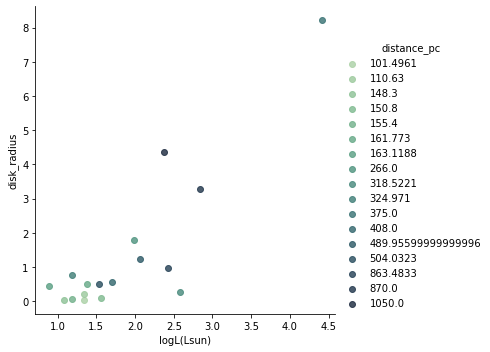

In [61]:
sns.lmplot(x='logL(Lsun)', y='disk_radius', data=table4_millan_gabet_2006,hue='distance_pc', palette="ch:r=-.5,l=.75")

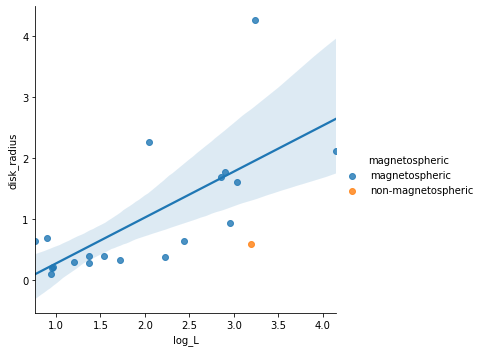

In [69]:
sns.lmplot(x='log_L', y='disk_radius', data=table3_perraut_2019,
           hue='magnetospheric')

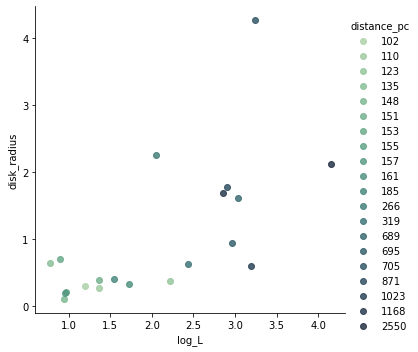

In [70]:
sns.lmplot(x='log_L', y='disk_radius', data=table3_perraut_2019,
           hue='distance_pc', palette="ch:r=-.5,l=.75")



(0.0, 5.976999999999999)

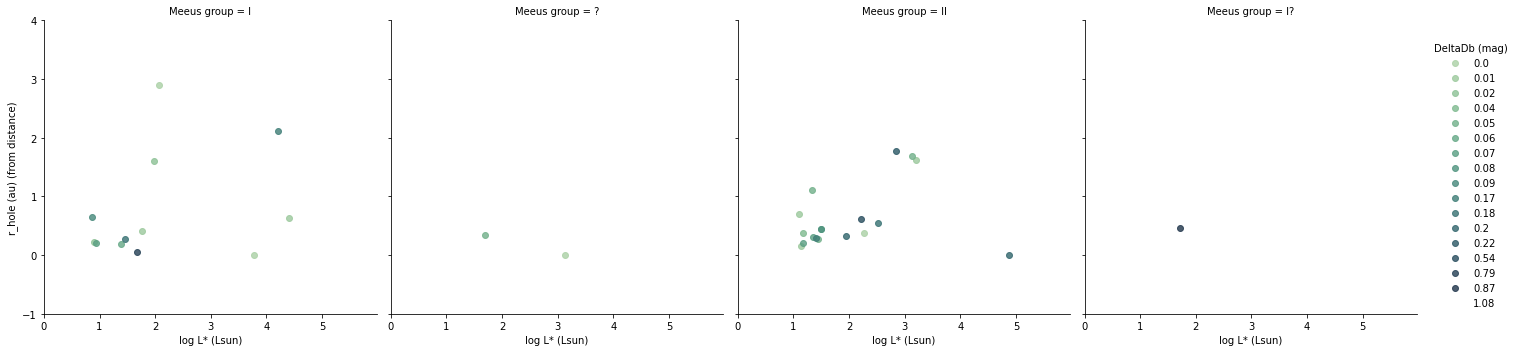

In [72]:
sns.lmplot(x='log L* (Lsun)', y='r_hole (au) (from distance)', data=size_luminosity_table,hue='DeltaDb (mag)',col="Meeus group",fit_reg=False, palette="ch:r=-.5,l=.75") 
plt.ylim(-1, 4)
plt.xlim(0, None)

(0.0, 5.976999999999999)

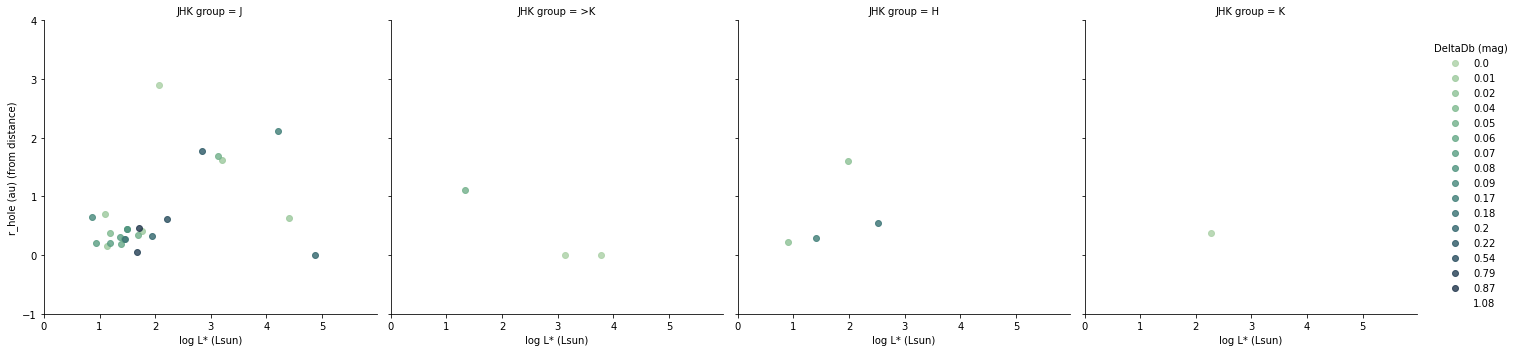

In [73]:
sns.lmplot(x='log L* (Lsun)', y='r_hole (au) (from distance)', data=size_luminosity_table,hue='DeltaDb (mag)',col="JHK group",fit_reg=False, palette="ch:r=-.5,l=.75") 
plt.ylim(-1, 4)
plt.xlim(0, None)

(0.0, 5.976999999999999)

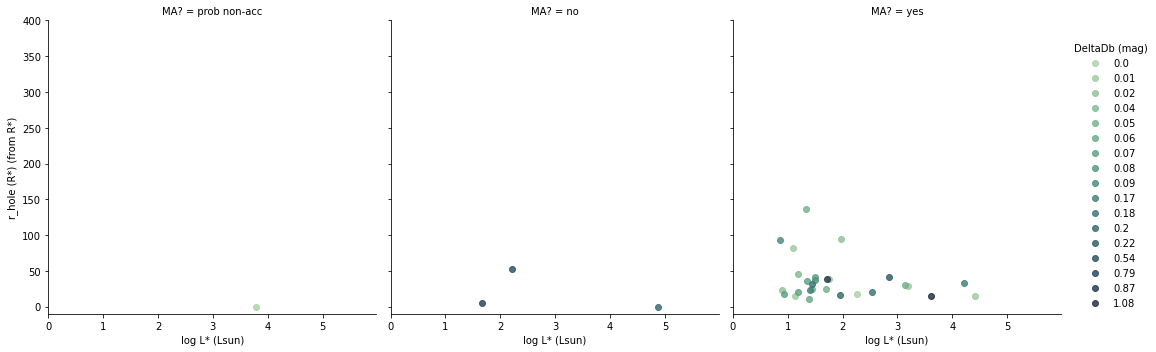

In [74]:
sns.lmplot(x='log L* (Lsun)', y='r_hole (R*) (from R*)', data=size_luminosity_table,hue='DeltaDb (mag)',col="MA?",fit_reg=False, palette="ch:r=-.5,l=.75") 
plt.ylim(-10, 400)
plt.xlim(0, None)

| Star      |   r_hole (mas) | error r_hole (mas)   | Reference r_hole(mas)   |   D Gaia (pc) |   error D Gaia (pc) | reference distance                          |   T*(K) |   err T* |   R*(Rsun) |   err R* |   log L* (Lsun) |   err logL*(Lsun) | Reference T*,R*,L*   |   r_hole (au) (from distance) | err r_hole (au) (from distance)   |   r_hole (R*) (from R*) | err r_hole (R*) (from R*)   |   r_hole-r_star(au) | err_rhole Ð rstar (au)   |   DeltaDb (mag) |   errDeltaDb (mag) | MA?          | ref DeltaDb-MA   | Brgamma _in?   | ref Brgamma_in?   |   CO_in? |   ref CO_in? | Meeus group   | ref Meeus group   | JHK group   | ref JHK_group    |   Unnamed: 32 |
|:----------|---------------:|:---------------------|:------------------------|--------------:|--------------------:|:--------------------------------------------|--------:|---------:|-----------:|---------:|----------------:|------------------:|:---------------------|------------------------------:|:----------------------------------|------------------------:|:----------------------------|--------------------:|:-------------------------|----------------:|-------------------:|:-------------|:-----------------|:---------------|:------------------|---------:|-------------:|:--------------|:------------------|:------------|:-----------------|--------------:|
| V590 Mon  |     1.68762    | 1014                 | Our paper               |          1722 |                 166 | Fairlamb+2015 (Wichittanakom+2020 bad qual) |   12500 |     1000 |       2.3  |     0.2  |            2.06 |              0.37 | Fairlamb+2015        |                        2.9061 | 1746.0604                         |           272.06        | 163461.62                   |                2.9  | 1746.06                  |            0    |               0.05 | nan          | Fairlamb+2015    | no             | our paper         |      nan |          nan | I             | Jorge priv comm   | J           | Jorge priv comm  |           nan |
| PDS 281   |     0.0016957  | upper limit          | Our paper               |           932 |                  44 | Vioque+2018                                 |   16000 |     1500 |      10.14 |     1    |            3.78 |              0.24 | Wichittanakom+2020   |                        0.0016 | #ÁVALOR!                          |             0.03        | #ÁVALOR!                    |               -0.05 | #ÁVALOR!                 |            0    |               0.05 | prob non-acc | Fairlamb+2015    | ?              | our paper         |      nan |          nan | I             | Guzman-Diaz+2020  | >K          | Guzman-Diaz+2020 |           nan |
| HD 94509  |     0.00170354 | upper limit          | Our paper               |          1830 |                 180 | Vioque+2018                                 |   11500 |     1000 |       9.32 |     1    |            3.13 |              0.24 | Wichittanakom+2020   |                        0.0031 | #ÁVALOR!                          |             0.07        | #ÁVALOR!                    |               -0.04 | #ÁVALOR!                 |            0    |               0.05 | nan          | Fairlamb+2015    | no             | our paper         |      nan |          nan | ?             | Guzman-Diaz+2020  | >K          | Guzman-Diaz+2020 |           nan |
| DG Cir    |     1.14985    | 0.057                | Our paper               |           833 |                  48 | Vioque+2018                                 |   11000 |     3000 |       1.89 |     0.4  |            1.67 |              0.72 | Wichittanakom+2020   |                        0.0475 | 0.0728                            |             5.41        | 8.37                        |                0.04 | 0.07                     |            0.79 |               0.05 | no           | Fairlamb+2015    | no             | our paper         |      nan |          nan | I             | Guzman-Diaz+2020  | J           | Guzman-Diaz+2020 |           nan |
| DG Cir    |     3.40137    | 14625                | Our paper               |           833 |                  48 | Vioque+2018                                 |   11000 |     3000 |       1.89 |     0.4  |            1.67 |              0.72 | Wichittanakom+2020   |                    12182.7    | 12182.2927                        |             1.38792e+06 | 1418623.00                  |            12182.7  | 12182.29                 |            0.79 |               0.05 | no           | Fairlamb+2015    | no             | our paper         |      nan |          nan | I             | Guzman-Diaz+2020  | J           | Guzman-Diaz+2020 |           nan |
| HD 141926 |     0.0068985  | upper limit          | Our paper               |          1340 |                 130 | Vioque+2018                                 |   28000 |     1500 |      11.61 |     2.32 |            4.87 |              0.26 | Wichittanakom+2020   |                        0.0092 | #ÁVALOR!                          |             0.17        | #ÁVALOR!                    |               -0.04 | #ÁVALOR!                 |            0.2  |               0.05 | no           | Fairlamb+2015    | no             | our paper         |      nan |          nan | II            | Guzman-Diaz+2020  | J           | Guzman-Diaz+2020 |           nan |



# Table A1: Observations


In [83]:
tableA1_observation_data = pd.read_csv("./tables/table1_draft.csv", sep=';', header=[0,1])

#Add calibrator info to table
tableA1_observation_data.insert(1, "Calibrator", ['HD259163', 'HD78958','HD94533', 'HD131662', 'HD145664'], True) 

#print(tableA1_observation_data.to_latex(index=False))

# Write table to CSV file
tableA1_observation_data.to_csv('./tables/tableA1_observation_data.csv')

tableA1_observation_data.head()


,Object,Calibrator,RA,DEC,Observation date,Type,Seeing,Telescope
,,,(h:m:s),(deg:m:s),,,,
0,V590Mon,HD259163,06:40:44.6,+09:48:02,27-10-2018,SINGLE,0.42'',U1-U2-U3-U4
1,PDS281,HD78958,08:55:45.9,-44:25:14,20-11-2018,SINGLE,0.57'',U1-U2-U3-U4
2,HD94509,HD94533,10:53:27.2,-58:25:24,20-12-2018,SINGLE,0.36'',U1-U2-U3-U4
3,DGCir,HD131662,15:03:23.8,-63:22:59,22-01-2019,SINGLE,0.46'',U1-U2-U3-U4
4,HD141926,HD145664,15:54:21.8,-55:19:44,21-03-2019,SINGLE,0.45'',A0-B2-C1-D0
